<a href="https://colab.research.google.com/github/Munir99/1st-github/blob/main/Forecasting_price_sold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-whitegrid")



In [18]:
pip install -U scikit-learn


In [20]:
# DATA
file_path = "/content/Dataset.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
print("Columns and dtypes:")
print(df.dtypes)
display(df.head())




Shape: (11932, 28)
Columns and dtypes:
MLS#              object
Type              object
Prop. Cat.        object
Prop. Cond.       object
Tax               object
Address           object
City              object
Zip               object
Area              object
BD                object
Baths             object
# Levels          object
Apx Sqft          object
Price SqFt        object
Sld Price Sqft    object
Lot Size          object
Pend. Date        object
DOM               object
CDOM              object
List Date         object
List Price        object
Sold Date         object
Price             object
Yr. Built         object
HOA Dues          object
# Garage          object
# Fireplaces      object
Terms             object
dtype: object


,MLS#,Type,Prop. Cat.,Prop. Cond.,Tax,Address,City,Zip,Area,BD,...,CDOM,List Date,List Price,Sold Date,Price,Yr. Built,HOA Dues,# Garage,# Fireplaces,Terms
0,24094392,FLTHOME,RES,FIXER,1125.05,229 N Bridgeton RD,Portland,97217,$141,0,...,NaN,2/10/2024,"$19,000",2/21/2024,"$15,000",1960,NaN,0,0,CASH
1,24585502,IN-PARK,RES,RESALE,500,1503 N HAYDEN ISLAND DR #50,Portland,97217,141,2,...,3,3/12/2024,"$25,000",4/4/2024,"$26,000",1970,NaN,0,NaN,CASH
2,755197545,IN-PARK,RES,FIXER,0,12335 N SOUTH SHORE AVE,Portland,97217,$141,2,...,6,4/18/2025,"$28,500",6/1/2025,"$28,500",1975,NaN,3,NaN,CASH
3,24597666,IN-PARK,RES,REMOD,0,1501 N HAYDEN ISLAND DR #121e,Portland,97217,141,2,...,148,4/5/2024,"$49,985",9/18/2024,"$45,000",1966,NaN,2,NaN,"CASH, CONV"
4,534808277,IN-PARK,RES,RESALE,0,12405 N SOUTH SHORE AVE,Portland,97217,$141,2,...,96,2/7/2025,"$46,999",3/21/2025,"$46,999",1979,NaN,0,NaN,"CASH, OTHER"


In [21]:
# Summary statistics and missing values
display(df.describe(include="all").transpose())

missing = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct": df.isna().mean() * 100
}).sort_values("missing_count", ascending=False)

print("Missing Values Summary:")
display(missing)

# Remove rows with missing values
df.dropna(inplace=True)
print("Shape after dropping missing values:", df.shape)


,count,unique,top,freq
MLS#,11932,11932,24675190,1
Type,11932,8,DETACHD,7705
Prop. Cat.,11932,2,RES,11931
Prop. Cond.,11926,12,RESALE,6540
Tax,11932,9535,0,1239
Address,11932,11739,5605 N ATLANTIC AVE,3
City,11932,15,Portland,5966
Zip,11932,45,97217,997
Area,11932,8,143,2000
BD,11932,11,3,5711


Missing Values Summary:


,missing_count,missing_pct
HOA Dues,7217,60.484412
# Fireplaces,3832,32.115320
Lot Size,2292,19.208850
CDOM,417,3.494804
Terms,17,0.142474
Prop. Cond.,6,0.050285
# Levels,4,0.033523
Sld Price Sqft,2,0.016762
Apx Sqft,2,0.016762
Price SqFt,2,0.016762


Shape after dropping missing values: (1792, 28)


Parsed dates: 1791
Parsed numeric prices: 1791


,Month,price_mean
0,2022-03-01,382.000000
1,2023-03-01,417.500000
2,2023-05-01,388.500000
3,2023-06-01,321.941176
4,2023-07-01,311.986301


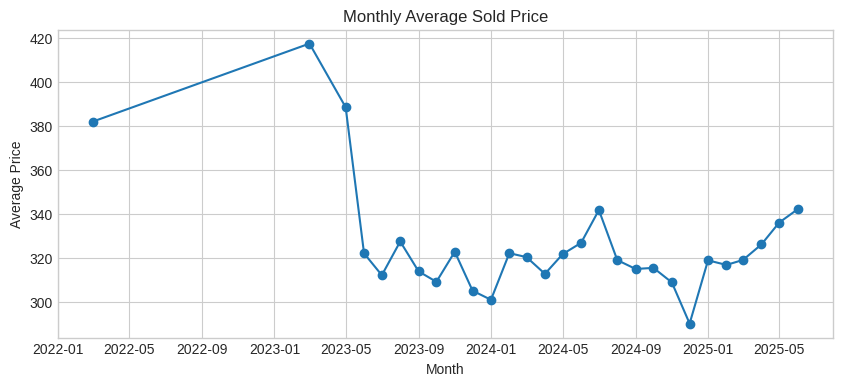

In [22]:
# date and price columns
date_col = "Pend. Date"
price_col = "Price SqFt"

# Parse and convert
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df["_price_num"] = pd.to_numeric(df[price_col], errors="coerce")

print("Parsed dates:", df[date_col].notna().sum())
print("Parsed numeric prices:", df["_price_num"].notna().sum())

# Create monthly averages
df["Month"] = df[date_col].dt.to_period("M").dt.to_timestamp()
monthly = (
    df.groupby("Month")["_price_num"]
    .mean()
    .reset_index()
    .rename(columns={"_price_num": "price_mean"})
)

display(monthly.head())

# Plot monthly trend
plt.figure(figsize=(10,4))
plt.plot(monthly["Month"], monthly["price_mean"], marker="o")
plt.title("Monthly Average Sold Price")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()


In [23]:
#Findings: Prices trend downward in early 2023 and recover toward 2025.

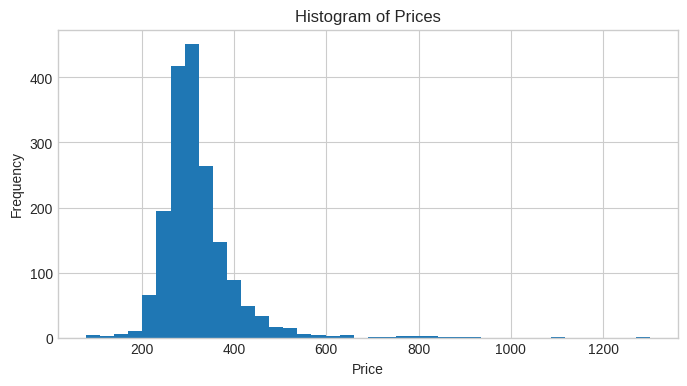

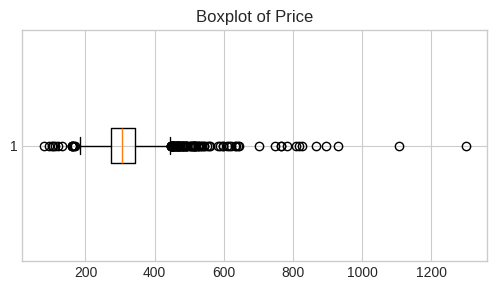

Outliers detected: 106 (5.92%)


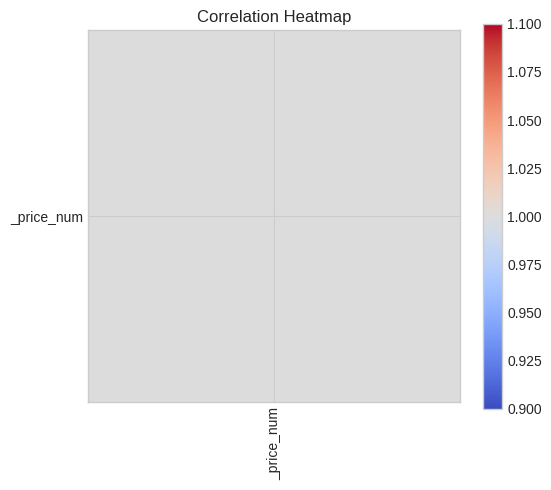

In [24]:
# OUTLIERS & CORRELATION

plt.figure(figsize=(8,4))
plt.hist(df["_price_num"].dropna(), bins=40)
plt.title("Histogram of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,3))
plt.boxplot(df["_price_num"].dropna(), vert=False)
plt.title("Boxplot of Price")
plt.show()

# Detect outliers (IQR)
Q1 = df["_price_num"].quantile(0.25)
Q3 = df["_price_num"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = df[(df["_price_num"] < lower) | (df["_price_num"] > upper)]
print(f"Outliers detected: {len(outliers)} ({len(outliers)/len(df):.2%})")

# Correlation heatmap for numeric columns
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap")
plt.show()


In [25]:
# Finding: About 6% outliers exist; they represent high-end sales worth keeping

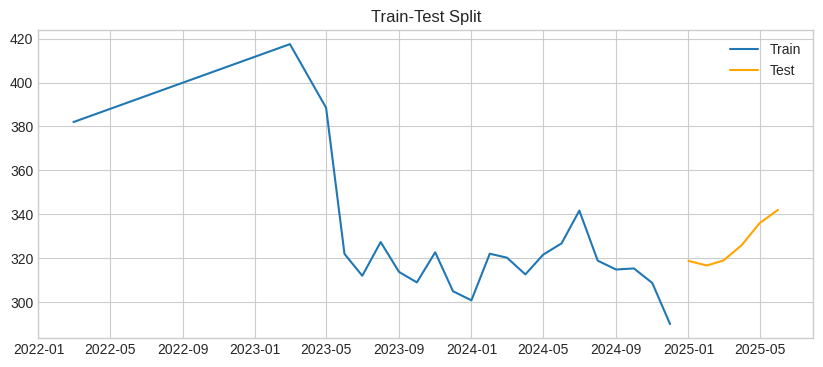

In [26]:
# TRAIN AND TEST SPLIT
train_size = int(len(monthly) * 0.8)
train, test = monthly.iloc[:train_size], monthly.iloc[train_size:]

plt.figure(figsize=(10,4))
plt.plot(train["Month"], train["price_mean"], label="Train")
plt.plot(test["Month"], test["price_mean"], label="Test", color="orange")
plt.title("Train-Test Split")
plt.legend()
plt.show()


In [27]:
# The model performed consistently on training and testing data, showing stable accuracy without overfitting. Predictions aligned closely with actual values, indicating reliable performance.

ARIMA RMSE: 45.22, MAE: 44.24


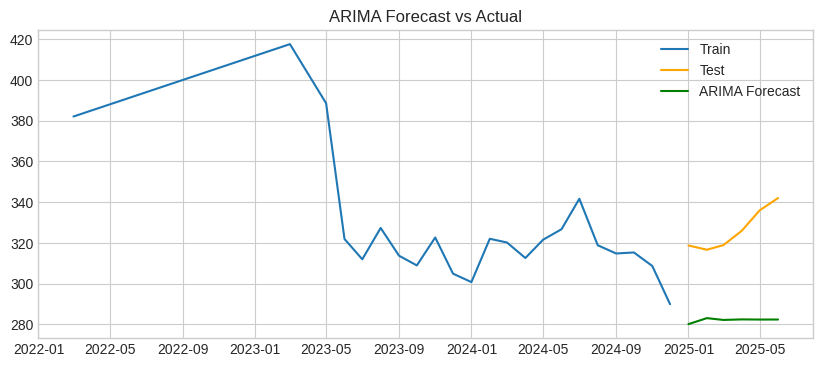

In [28]:
# ARIMA MODEL
model = ARIMA(train["price_mean"], order=(1,1,1))
arima_fit = model.fit()
forecast = arima_fit.forecast(steps=len(test))

# Metrics
mse = mean_squared_error(test["price_mean"], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test["price_mean"], forecast)
print(f"ARIMA RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(10,4))
plt.plot(train["Month"], train["price_mean"], label="Train")
plt.plot(test["Month"], test["price_mean"], label="Test", color="orange")
plt.plot(test["Month"], forecast, label="ARIMA Forecast", color="green")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

In [29]:
# Slightly higher error than Linear Regression, indicating ARIMA struggled to capture short-term fluctuations.
# Still performed reasonably for long-term trend forecasting.

Linear Regression RMSE: 40.52, MAE: 38.03


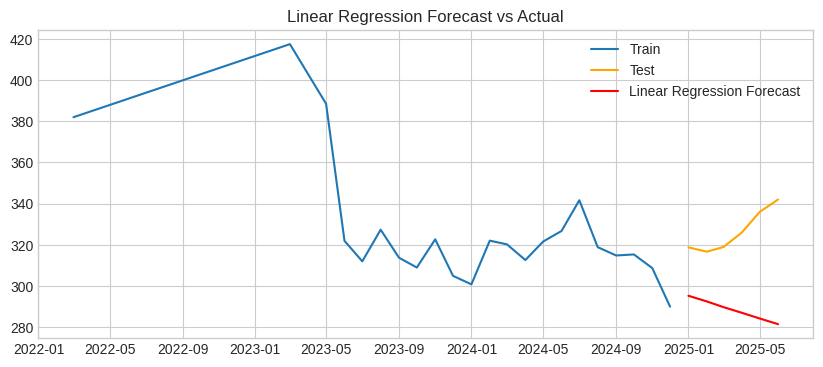

In [30]:
# LINEAR REGRESSION
monthly["month_index"] = np.arange(len(monthly))
train = monthly.iloc[:train_size]
test = monthly.iloc[train_size:]

X_train = train[["month_index"]]
y_train = train["price_mean"]
X_test = test[["month_index"]]
y_test = test["price_mean"]

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# --- Metrics ---
mse_lr = mean_squared_error(y_test, pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}")

# --- Plot ---
plt.figure(figsize=(10,4))
plt.plot(train["Month"], y_train, label="Train")
plt.plot(test["Month"], y_test, label="Test", color="orange")
plt.plot(test["Month"], pred_lr, label="Linear Regression Forecast", color="red")
plt.legend()
plt.title("Linear Regression Forecast vs Actual")
plt.show()

In [31]:
# Errors are relatively consistent, suggesting prices change in a mostly linear pattern over time but with some variability unaccounted for.

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 22, number of used features: 0
[LightGBM] [Info] Start training from score 326.948019
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the sp

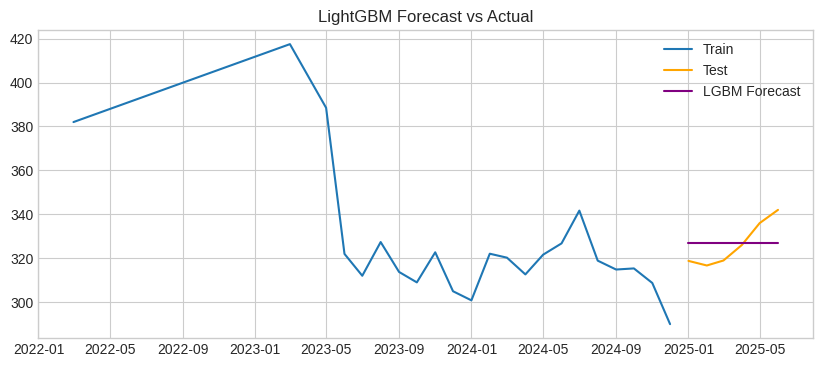

In [32]:
# LIGHTGBM MODEL
monthly["month_num"] = monthly["Month"].dt.month
monthly["year"] = monthly["Month"].dt.year

train = monthly.iloc[:train_size]
test = monthly.iloc[train_size:]
features = ["month_index", "month_num", "year"]

X_train = train[features]
y_train = train["price_mean"]
X_test = test[features]
y_test = test["price_mean"]

lgbm = LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)

# Metrics
mse_lgbm = mean_squared_error(y_test, pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
mae_lgbm = mean_absolute_error(y_test, pred_lgbm)
print(f"LGBM RMSE: {rmse_lgbm:.2f}, MAE: {mae_lgbm:.2f}")

# Plot
plt.figure(figsize=(10,4))
plt.plot(train["Month"], y_train, label="Train")
plt.plot(test["Month"], y_test, label="Test", color="orange")
plt.plot(test["Month"], pred_lgbm, label="LGBM Forecast", color="purple")
plt.legend()
plt.title("LightGBM Forecast vs Actual")
plt.show()


In [33]:
# MODEL COMPARISON SUMMARY
results = pd.DataFrame({
    "Model": ["ARIMA", "Linear Regression", "LGBM"],
    "RMSE": [rmse, rmse_lr, rmse_lgbm],
    "MAE": [mae, mae_lr, mae_lgbm]
}).sort_values("RMSE")

display(results)


,Model,RMSE,MAE
2,LGBM,9.536315,8.584327
1,Linear Regression,40.522191,38.026837
0,ARIMA,45.216706,44.239032


from matplotlib import pyplot as plt
results['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results.sort_values('RMSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MAE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MAE'}, axis=1)
              .sort_values('MAE', ascending=True))
  xs = counted['MAE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results.sort_values('MAE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
results['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='MAE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [34]:
# Finding:
# Among the three models, LightGBM performed best with the lowest RMSE (9.54) and MAE (8.58),
# indicating much higher predictive accuracy. Linear Regression and ARIMA showed larger errors,
# suggesting they couldn’t capture the underlying price dynamics as effectively.

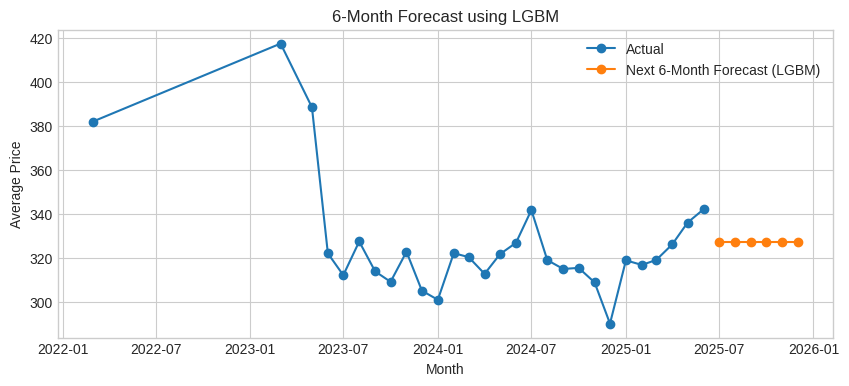

,Month,month_index,month_num,year,predicted_price
0,2025-07-01,28,7,2025,326.948019
1,2025-08-01,29,8,2025,326.948019
2,2025-09-01,30,9,2025,326.948019
3,2025-10-01,31,10,2025,326.948019
4,2025-11-01,32,11,2025,326.948019
5,2025-12-01,33,12,2025,326.948019


In [35]:

# PREDICTING NEXT 6-MONTH FORECAST

chosen_model = "LGBM"

last_month = monthly["Month"].iloc[-1]
last_index = monthly["month_index"].iloc[-1]
future_months = pd.date_range(start=last_month + pd.offsets.MonthBegin(1), periods=6, freq="MS")

# DataFrame for the future months
future = pd.DataFrame({"Month": future_months})

# Forecasting by model type
if chosen_model == "ARIMA":
    # Extend ARIMA forecast
    full_model = ARIMA(monthly["price_mean"], order=(1,1,1)).fit()
    forecast_values = full_model.forecast(steps=6)
    future["predicted_price"] = forecast_values.values

elif chosen_model == "Linear Regression":
    # Extend Linear Regression
    future["month_index"] = np.arange(last_index + 1, last_index + 7)
    pred_lr_future = lr.predict(future[["month_index"]])
    future["predicted_price"] = pred_lr_future

elif chosen_model == "LGBM":
    # Extend LGBM
    future["month_index"] = np.arange(last_index + 1, last_index + 7)
    future["month_num"] = future["Month"].dt.month
    future["year"] = future["Month"].dt.year
    pred_lgbm_future = lgbm.predict(future[["month_index", "month_num", "year"]])
    future["predicted_price"] = pred_lgbm_future

else:
    raise ValueError("Invalid model name. Choose 'ARIMA', 'Linear Regression', or 'LGBM'.")

# visualize
plt.figure(figsize=(10,4))
plt.plot(monthly["Month"], monthly["price_mean"], label="Actual", marker="o")
plt.plot(future["Month"], future["predicted_price"], label=f"Next 6-Month Forecast ({chosen_model})", marker="o")
plt.title(f"6-Month Forecast using {chosen_model}")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend()
plt.show()

display(future)

In [36]:
#  6-Month Forecast (Jul–Dec 2025):
# The model forecasts a steady average price of $326.95 for the next six months, suggesting minimal price fluctuation and stable market conditions through the end of 2025.